In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("user_interactions.csv")

Data Exploration and Cleaning:

In [4]:
data.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [6]:
# Checking for missing values:
data.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [7]:
# Shape of the data
data.shape

(5000, 3)

In [8]:
# Data Summary
data.describe()

,Time_Spent_Seconds
count,5000.000000
mean,304.508800
std,168.978666
min,10.000000
25%,160.000000
50%,301.000000
75%,452.000000
max,599.000000


In [9]:
data['Page_Viewed'].value_counts()

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

In [10]:
data['Time_Spent_Seconds'].value_counts().sum()

5000

User Behavior Analysis:

     Page_Viewed  Time_Spent_Seconds
0      Cart Page          302.819404
1  Category Page          297.839506
2  Checkout Page          306.760364
3       Homepage          310.215311
4   Product Page          304.562434


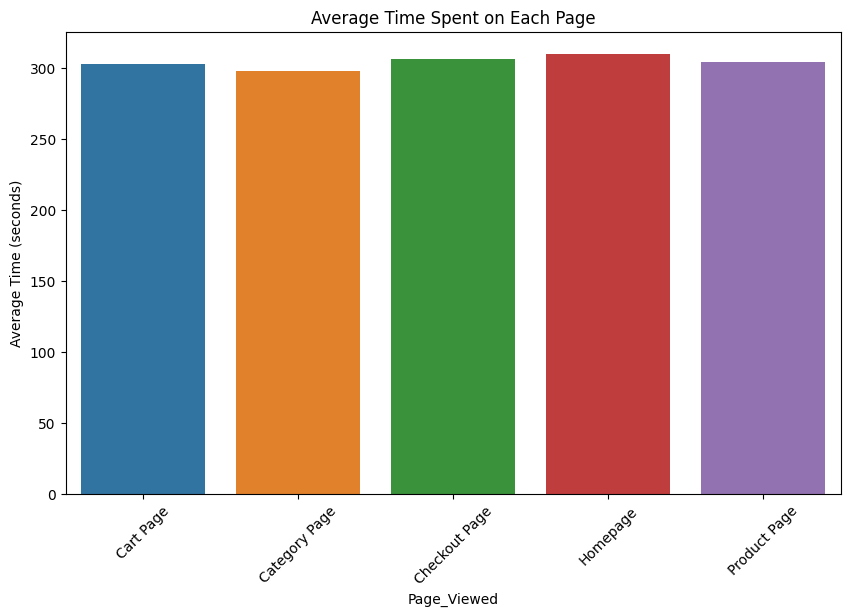

In [11]:
# Most visited pages and average time spent on each page:

avg_duration_per_page = data.groupby('Page_Viewed')['Time_Spent_Seconds'].mean().reset_index()
print(avg_duration_per_page)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Page_Viewed', y='Time_Spent_Seconds', data=avg_duration_per_page)
plt.title('Average Time Spent on Each Page')
plt.xlabel('Page_Viewed')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45)
plt.show()

Homepage         20.90
Cart Page        20.82
Checkout Page    19.78
Category Page    19.44
Product Page     19.06
Name: Page_Viewed, dtype: float64


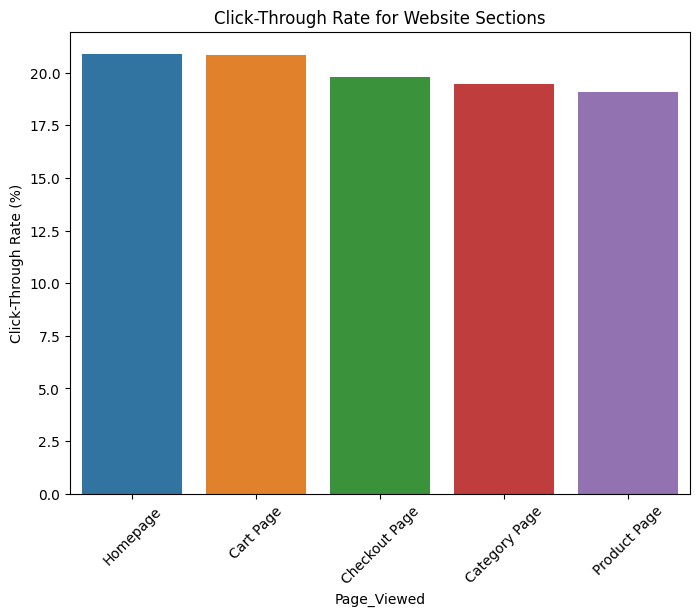

In [12]:
# Click-through rate for different sections of the website

click_through_rate = data['Page_Viewed'].value_counts(normalize=True) * 100
print(click_through_rate)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=click_through_rate.index, y=click_through_rate.values)
plt.title('Click-Through Rate for Website Sections')
plt.xlabel('Page_Viewed')
plt.ylabel('Click-Through Rate (%)')
plt.xticks(rotation=45)
plt.show()


Purchase Analysis:

In [20]:
# Overall conversion rate:
# Let's assume that a purchase is made on the 'Checkout Page.'
conversion_rate = (data['Page_Viewed'] == 'Checkout Page').mean() * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")


Overall Conversion Rate: 19.78%


Page_Viewed
Cart Page        1041
Category Page     972
Checkout Page     989
Homepage         1045
Product Page      953
Name: Page_Viewed, dtype: int64


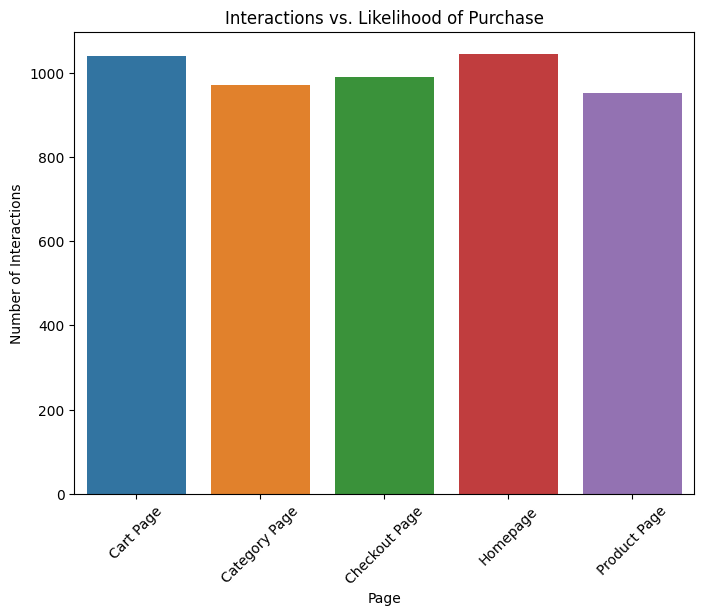

In [14]:
#   Relationship between interactions and likelihood of purchase
interactions_vs_purchase = data.groupby('Page_Viewed')['Page_Viewed'].count()
print(interactions_vs_purchase)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=interactions_vs_purchase.index, y=interactions_vs_purchase.values)
plt.title('Interactions vs. Likelihood of Purchase')
plt.xlabel('Page')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


For Cohort Analysis we need to add new column to dataset that is signupdate and doing analysis

In [15]:
# Add new column
data ['SignUpDate'] =pd.date_range(start='1990-01-01', periods=5000, freq='D')

In [16]:
# Cohort analysis
data['CohortMonth'] = data['SignUpDate'].dt.to_period('M')
cohorts = data.groupby(['CohortMonth', 'User_ID'])['User_ID'].count().unstack().fillna(0)


In [17]:
# Retention calculation
cohort_sizes = cohorts.iloc[:, 0]
retention = cohorts.divide(cohort_sizes, axis=0)

# Lifetime Value (LTV) calculation
ltv = data.groupby('CohortMonth')['Time_Spent_Seconds'].sum()

# Website performance optimization
# For demonstration purposes, let's calculate the bounce rate as the percentage of users who only visited the homepage
bounce_rate = (data[data['Page_Viewed'] == 'Homepage']['User_ID'].nunique() / data['User_ID'].nunique()) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

# Conversion rate as the percentage of users who reached the checkout page
conversion_rate = (data[data['Page_Viewed'] == 'Checkout Page']['User_ID'].nunique() / data['User_ID'].nunique()) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")


Bounce Rate: 29.53%
Conversion Rate: 28.13%


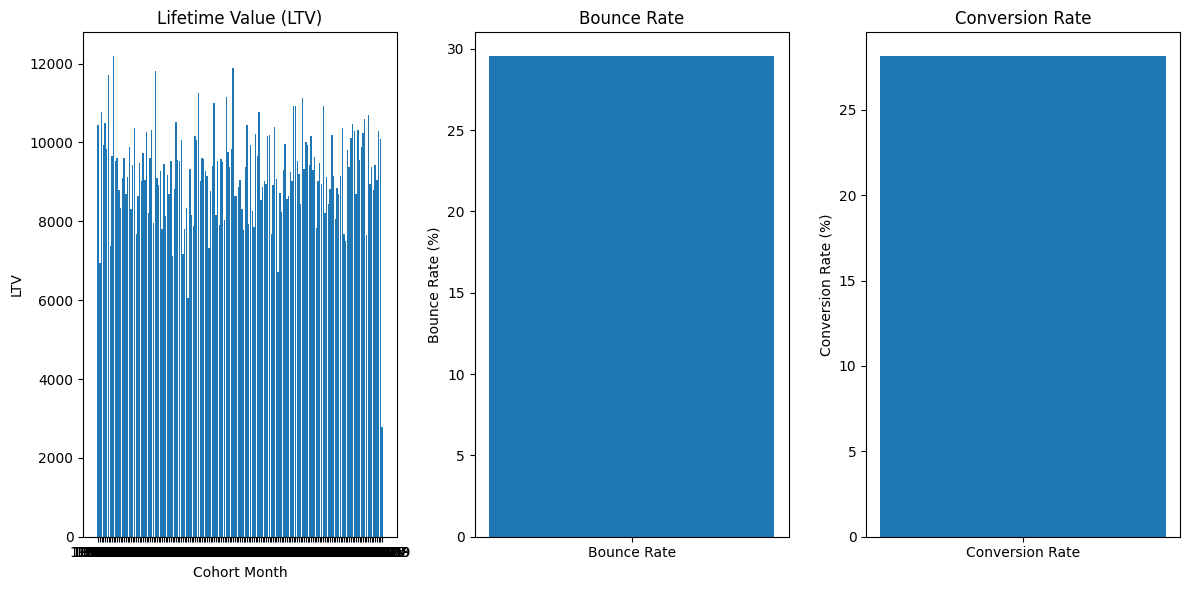

In [18]:
# For simplicity, we'll create a basic bar chart to display LTV, bounce rate, and conversion rate.
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.bar(ltv.index.strftime('%Y-%m'), ltv.values)
plt.title('Lifetime Value (LTV)')
plt.xlabel('Cohort Month')
plt.ylabel('LTV')

plt.subplot(1, 3, 2)
plt.bar(['Bounce Rate'], [bounce_rate])
plt.title('Bounce Rate')
plt.ylabel('Bounce Rate (%)')

plt.subplot(1, 3, 3)
plt.bar(['Conversion Rate'], [conversion_rate])
plt.title('Conversion Rate')
plt.ylabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

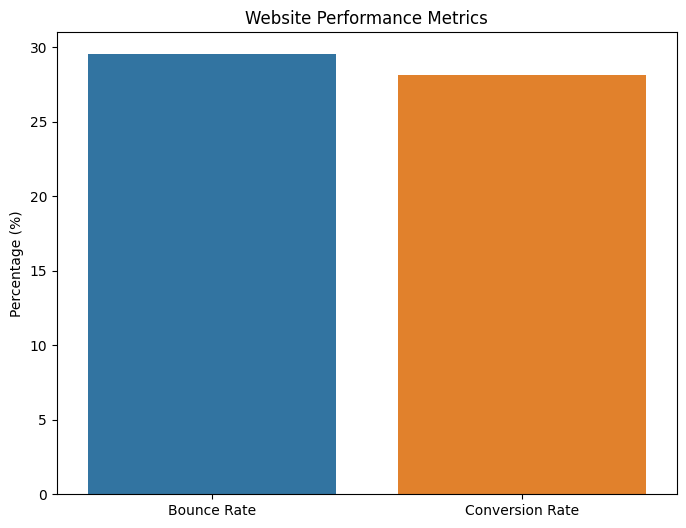

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Bounce Rate', 'Conversion Rate'], y=[bounce_rate, conversion_rate])
plt.title('Website Performance Metrics')
plt.ylabel('Percentage (%)')
plt.show()